<a href="https://colab.research.google.com/github/vishal120700/The-Spark-Foundation/blob/main/Indian_Premier_League_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* ***The Sparks Foundation***

**GRIP (Graduate Rotational Internship Program) March 2023**

# **Project Name**    -  Indian Premier League



##### **Project Type**    - TASK-05 (Exploratory Data Analysis - Sports)
##### **Domain : Data Science & Business Analytics**
##### **Name   -**  Vishal Rahul Pagare


[Dataset's Link](https://bit.ly/34SRn3b)

# **Problem Statement**


* **Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’**

* **As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.**

* **Suggest teams or players a company should endorse for its products.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Load Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Loading Deliveries Dataset

In [6]:
Data = pd.read_csv("/content/drive/MyDrive/Indian Premier League Project/deliveries.csv")

deliveries_df = pd.DataFrame(Data)

print("Data has been successfully imported")

Data has been successfully imported


In [7]:
# Loading Matches Dataset.

In [8]:
Data = pd.read_csv("/content/drive/MyDrive/Indian Premier League Project/matches.csv")

matches_df = pd.DataFrame(Data)

print("Data has been successfully imported")

Data has been successfully imported


### Dataset First View

In [9]:
# Dataset First Look

In [10]:
# Deliveries Dataset First Look 

In [11]:
deliveries_df.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [12]:
# Matches Dataset First Look 

In [13]:
matches_df.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

### Dataset Rows & Columns count

In [14]:
# Deliveries Dataset Rows & Columns count

In [15]:
deliveries_df.shape

(179078, 21)

In [16]:
# Matches Dataset Rows & Columns count

In [17]:
matches_df.shape

(756, 18)

### Dataset Information

In [18]:
# Deliveries Dataset Info

In [19]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [20]:
# Matches Dataset Info

In [21]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

#### Duplicate Values

In [22]:
# Deliveries Dataset Duplicate Value Count

In [23]:
len(deliveries_df[deliveries_df.duplicated()])

23

In [24]:
# Matches Dataset Duplicate Value Count

In [25]:
len(matches_df[matches_df.duplicated()])

0

#### Missing Values/Null Values

In [26]:
# Deliveries Dataset Missing Values/Null Values Count

In [27]:
print(deliveries_df.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


In [28]:
# Matches Dataset Missing Values/Null Values Count

In [29]:
print(matches_df.isnull().sum())

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [30]:
# Diliveries Dataset Visualizing the missing values

<AxesSubplot:>

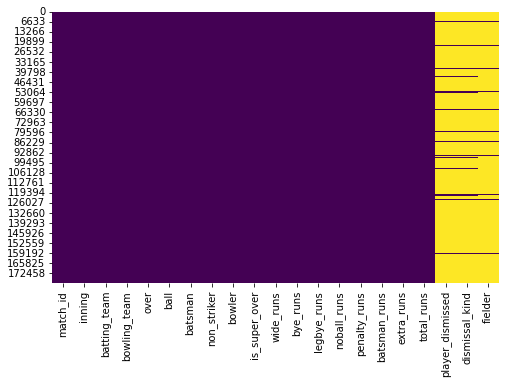

In [31]:
plt.figure(figsize=(8,5))
sns.heatmap(deliveries_df.isnull(), cbar=False, cmap='viridis')

In [32]:
# Matches Dataset Visualizing the missing values

<AxesSubplot:>

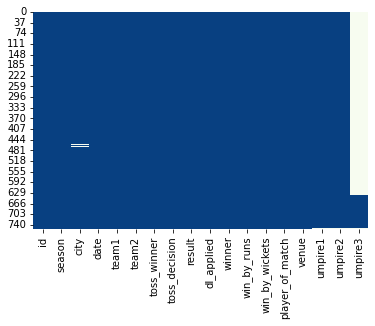

In [33]:
sns.heatmap(matches_df.isnull(), cbar=False, cmap='GnBu_r')

## ***2. Understanding Your Variables***

In [34]:
# Deliveries Dataset Columns

In [35]:
deliveries_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [36]:
# Matches Dataset Columns

In [37]:
matches_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [38]:
# Deliveries Dataset Describe

In [39]:
deliveries_df.describe(include='all')

match_id         inning    batting_team    bowling_team  \
count   179078.000000  179078.000000          179078          179078   
unique            NaN            NaN              15              15   
top               NaN            NaN  Mumbai Indians  Mumbai Indians   
freq              NaN            NaN           22619           22517   
mean      1802.252957       1.482952             NaN             NaN   
std       3472.322805       0.502074             NaN             NaN   
min          1.000000       1.000000             NaN             NaN   
25%        190.000000       1.000000             NaN             NaN   
50%        379.000000       1.000000             NaN             NaN   
75%        567.000000       2.000000             NaN             NaN   
max      11415.000000       5.000000             NaN             NaN   

                 over           ball  batsman non_striker           bowler  \
count   179078.000000  179078.000000   179078      179078           179078   
unique            NaN            NaN      516         511              405   
top               NaN            NaN  V Kohli    SK Raina  Harbhajan Singh   
freq              NaN            NaN     4211        4173             3451   
mean        10.162488       3.615587      NaN         NaN              NaN   
std          5.677684       1.806966      NaN         NaN              NaN   
min          1.000000       1.000000      NaN         NaN              NaN   
25%          5.000000       2.000000      NaN         NaN              NaN   
50%         10.000000       4.000000      NaN         NaN              NaN   
75%         15.000000       5.000000      NaN         NaN              NaN   
max         20.000000       9.000000      NaN         NaN              NaN   

        is_super_over  ...       bye_runs    legbye_runs    noball_runs  \
count   179078.000000  ...  179078.000000  179078.000000  179078.000000   
unique            NaN  ...            NaN            NaN            NaN   
top               NaN  ...            NaN            NaN            NaN   
freq              NaN  ...            NaN            NaN            NaN   
mean         0.000452  ...       0.004936       0.021136       0.004183   
std          0.021263  ...       0.116480       0.194908       0.070492   
min          0.000000  ...       0.000000       0.000000       0.000000   
25%          0.000000  ...       0.000000       0.000000       0.000000   
50%          0.000000  ...       0.000000       0.000000       0.000000   
75%          0.000000  ...       0.000000       0.000000       0.000000   
max          1.000000  ...       4.000000       5.000000       5.000000   

         penalty_runs   batsman_runs     extra_runs     total_runs  \
count   179078.000000  179078.000000  179078.000000  179078.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         0.000056       1.246864       0.067032       1.313897   
std          0.016709       1.608270       0.342553       1.605422   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       0.000000       0.000000       0.000000   
50%          0.000000       1.000000       0.000000       1.000000   
75%          0.000000       1.000000       0.000000       1.000000   
max          5.000000       7.000000       7.000000      10.000000   

        player_dismissed dismissal_kind   fielder  
count               8834           8834      6448  
unique               487              9       499  
top             SK Raina         caught  MS Dhoni  
freq                 162           5348       159  
mean                 NaN            NaN       NaN  
std                  NaN            NaN       NaN  
min                  NaN            NaN       NaN  
25%                  NaN            NaN       NaN  
5

In [40]:
# Matches Dataset Describe

In [41]:
matches_df.describe(include='all')

id       season    city        date           team1  \
count     756.000000   756.000000     749         756             756   
unique           NaN          NaN      32         546              15   
top              NaN          NaN  Mumbai  2011-04-17  Mumbai Indians   
freq             NaN          NaN     101           2             101   
mean     1792.178571  2013.444444     NaN         NaN             NaN   
std      3464.478148     3.366895     NaN         NaN             NaN   
min         1.000000  2008.000000     NaN         NaN             NaN   
25%       189.750000  2011.000000     NaN         NaN             NaN   
50%       378.500000  2013.000000     NaN         NaN             NaN   
75%       567.250000  2016.000000     NaN         NaN             NaN   
max     11415.000000  2019.000000     NaN         NaN             NaN   

                              team2     toss_winner toss_decision  result  \
count                           756             756           756     756   
unique                           15              15             2       3   
top     Royal Challengers Bangalore  Mumbai Indians         field  normal   
freq                             95              98           463     743   
mean                            NaN             NaN           NaN     NaN   
std                             NaN             NaN           NaN     NaN   
min                             NaN             NaN           NaN     NaN   
25%                             NaN             NaN           NaN     NaN   
50%                             NaN             NaN           NaN     NaN   
75%                             NaN             NaN           NaN     NaN   
max                             NaN             NaN           NaN     NaN   

        dl_applied          winner  win_by_runs  win_by_wickets  \
count   756.000000             752   756.000000      756.000000   
unique         NaN              15          NaN             NaN   
top            NaN  Mumbai Indians          NaN             NaN   
freq           NaN             109          NaN             NaN   
mean      0.025132             NaN    13.283069        3.350529   
std       0.156630             NaN    23.471144        3.387963   
min       0.000000             NaN     0.000000        0.000000   
25%       0.000000             NaN     0.000000        0.000000   
50%       0.000000             NaN     0.000000        4.000000   
75%       0.000000             NaN    19.000000        6.000000   
max       1.000000             NaN   146.000000       10.000000   

       player_of_match         venue          umpire1        umpire2  \
count              752           756              754            754   
unique             226            41               61             65   
top           CH Gayle  Eden Gardens  HDPK Dharmasena  C Shamshuddin   
freq                21            77               73             57   
mean               NaN           NaN              NaN            NaN   
std                NaN           NaN              NaN            NaN   
min                NaN           NaN              NaN            NaN   
25%                NaN           NaN              NaN            NaN   
50%                NaN           NaN              NaN            NaN   
75%                NaN           NaN              NaN            NaN   
max                NaN           NaN              NaN            NaN   

            umpire3  
count           119  
unique           25  
top     Nitin Menon  
freq             10  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

### Check Unique Values for each variable.

In [42]:
# Check Unique Values for each variable.

In [43]:
# For Deliveries Dataset

In [44]:
for i in deliveries_df.columns.tolist():
  print("No. of unique values in ",i,"is",deliveries_df[i].nunique(),".")

No. of unique values in  match_id is 756 .
No. of unique values in  inning is 5 .
No. of unique values in  batting_team is 15 .
No. of unique values in  bowling_team is 15 .
No. of unique values in  over is 20 .
No. of unique values in  ball is 9 .
No. of unique values in  batsman is 516 .
No. of unique values in  non_striker is 511 .
No. of unique values in  bowler is 405 .
No. of unique values in  is_super_over is 2 .
No. of unique values in  wide_runs is 6 .
No. of unique values in  bye_runs is 5 .
No. of unique values in  legbye_runs is 6 .
No. of unique values in  noball_runs is 5 .
No. of unique values in  penalty_runs is 2 .
No. of unique values in  batsman_runs is 8 .
No. of unique values in  extra_runs is 7 .
No. of unique values in  total_runs is 10 .
No. of unique values in  player_dismissed is 487 .
No. of unique values in  dismissal_kind is 9 .
No. of unique values in  fielder is 499 .


In [45]:
# For Matches Dataset

In [46]:
for i in matches_df.columns.tolist():
  print("No. of unique values in ",i,"is",matches_df[i].nunique(),".")

No. of unique values in  id is 756 .
No. of unique values in  season is 12 .
No. of unique values in  city is 32 .
No. of unique values in  date is 546 .
No. of unique values in  team1 is 15 .
No. of unique values in  team2 is 15 .
No. of unique values in  toss_winner is 15 .
No. of unique values in  toss_decision is 2 .
No. of unique values in  result is 3 .
No. of unique values in  dl_applied is 2 .
No. of unique values in  winner is 15 .
No. of unique values in  win_by_runs is 89 .
No. of unique values in  win_by_wickets is 11 .
No. of unique values in  player_of_match is 226 .
No. of unique values in  venue is 41 .
No. of unique values in  umpire1 is 61 .
No. of unique values in  umpire2 is 65 .
No. of unique values in  umpire3 is 25 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [47]:
# Remove duplicates from Deliveries dataset.

In [48]:
# Remove duplicates
deliveries_df = deliveries_df.drop_duplicates()

In [49]:
# Deliveries Dataset Duplicate Value Count
len(deliveries_df[deliveries_df.duplicated()])

0

* **Merging The Datasets**

In [50]:
season_data=matches_df[['id','season','winner']]
season_data.head()

id  season                       winner
0   1    2017          Sunrisers Hyderabad
1   2    2017       Rising Pune Supergiant
2   3    2017        Kolkata Knight Riders
3   4    2017              Kings XI Punjab
4   5    2017  Royal Challengers Bangalore

In [51]:
complete_data=deliveries_df.merge(season_data,how='inner',left_on='match_id',right_on='id')
complete_data.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  penalty_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...             0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...             0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...             0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...             0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...             0   

   batsman_runs  extra_runs  total_runs  player_dismissed  dismissal_kind  \
0             0           0           0               NaN             NaN   
1             0           0           0               NaN             NaN   
2             4           0           4               NaN             NaN   
3             0           0           0               NaN             NaN   
4             0           2           2               NaN             NaN   

   fielder  id season               winner  
0      NaN   1   2017  Sunrisers Hyderabad  
1      NaN   1   2017  Sunrisers Hyderabad  
2      NaN   1   2017  Sunrisers Hyderabad  
3      NaN   1   2017  Sunrisers Hyderabad  
4      NaN   1   2017  Sunrisers Hyderabad  

[5 rows x 24 columns]

In [52]:
complete_data. columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'winner'],
      dtype='object')

* **Now Check For Number Of Matches Won by Team in Each Season**

In [53]:
wins_per_season = matches_df.groupby("season")["winner"].value_counts()
wins_per_season.head()

season  winner             
2008    Rajasthan Royals       13
        Kings XI Punjab        10
        Chennai Super Kings     9
        Delhi Daredevils        7
        Mumbai Indians          7
Name: winner, dtype: int64

## ***4. Data Vizualization***

#### Total number of teams participating (Team names and its size).

In [54]:
#total number of teams participating (Team names)

team1_names = matches_df.team1.unique()
team1_names.tolist()
team2_names = matches_df.team2.unique()
team2_names.tolist()
total_teams = list(set(team1_names) & set(team2_names))
print(total_teams)

['Sunrisers Hyderabad', 'Kings XI Punjab', 'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals', 'Chennai Super Kings', 'Rising Pune Supergiant', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals', 'Gujarat Lions', 'Royal Challengers Bangalore', 'Delhi Daredevils', 'Deccan Chargers', 'Kochi Tuskers Kerala']


In [55]:
#Total number of teams participating (Team size)
print(len(total_teams))

15


#### Chart - 1 - 

In [56]:
# Chart - 1 visualization code

* Number of Matches played in each IPL season ?

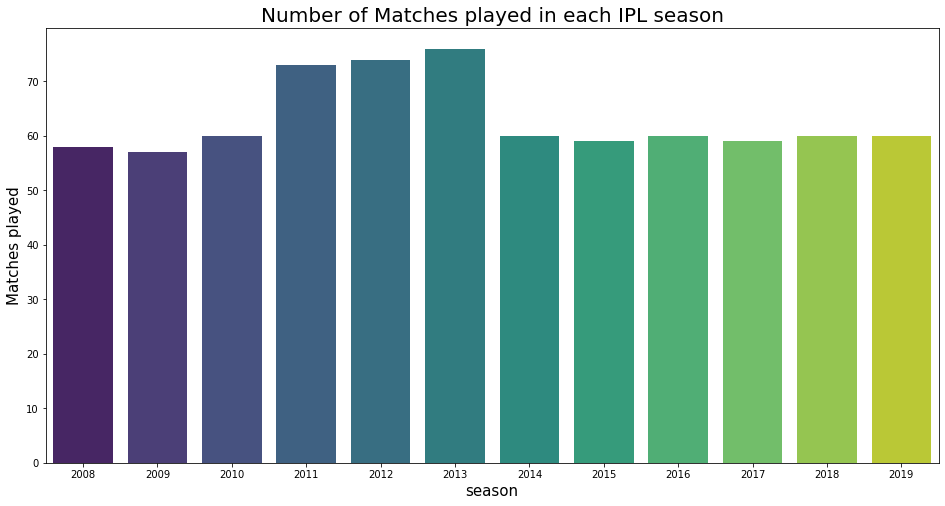

In [57]:
plt.figure(figsize = (16,8))
sns.countplot('season',data= matches_df,palette='viridis')
plt.title("Number of Matches played in each IPL season",fontsize=20)
plt.xlabel("season",fontsize=15)
plt.ylabel('Matches played',fontsize=15)
plt.show()

#### Chart - 2 - Barplot

In [58]:
# Chart - 2 visualization code

* Maximum Toss Won by the teams ?

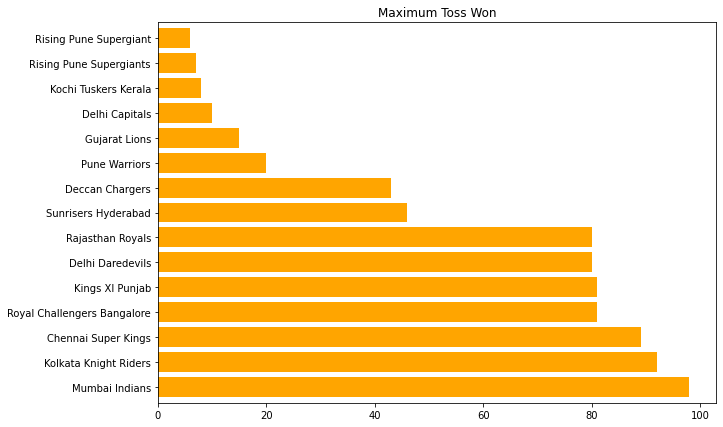

In [59]:
plt.subplots(figsize=(10,7))
ax=matches_df['toss_winner'].value_counts().plot.barh(width=0.8, color='orange')
plt.title("Maximum Toss Won")
plt.show()

#### Chart - 3 - Countplot

In [60]:
# Chart - 3 visualization code

* Numbers of matches won by team ?

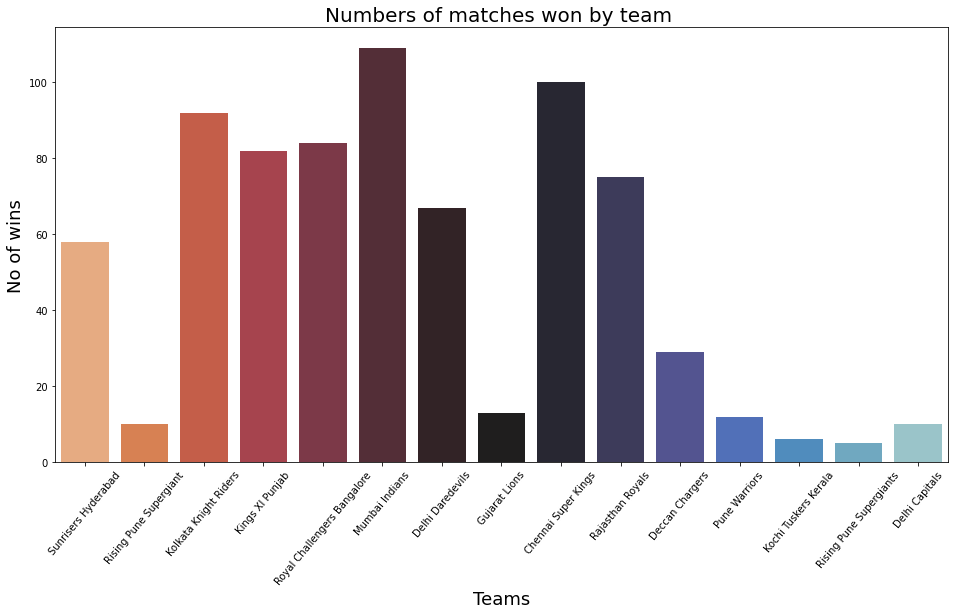

In [61]:
plt.figure(figsize = (16,8))
sns.countplot(x='winner',data=matches_df, palette='icefire_r')
plt.title("Numbers of matches won by team ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=18)
plt.ylabel("No of wins",fontsize=18)
plt.show()

#### Chart - 4 - Pie Chart

In [62]:
# Chart - 4 visualization code

* Teams who had won Toss and Won the match.

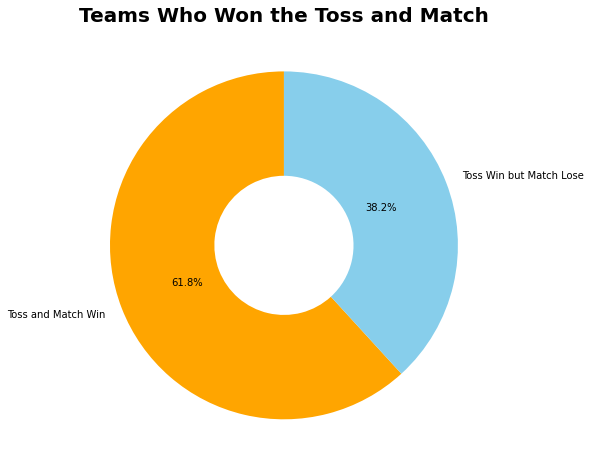

In [63]:
# Set up the data
Tosswin_matchwin = matches_df[matches_df['toss_winner'] == matches_df['winner']]
slices = [len(Tosswin_matchwin), (636 - len(Tosswin_matchwin))]
labels = ['Toss and Match Win', 'Toss Win but Match Lose']

# Set the color scheme
#colors = ['#2ecc71', '#e74c3c']  # Green and Red
colors = ['orange', 'skyblue']
plt.figure(figsize = (10,8))

# Create the pie chart
plt.pie(slices, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.6))
plt.title('Teams Who Won the Toss and Match', fontsize=20, fontweight='bold')

# Show the plot
plt.show()



#### Chart - 5 - Bar Chart

In [64]:
# Chart - 5 visualization code

* Plotting the above data Analysis - Total Won

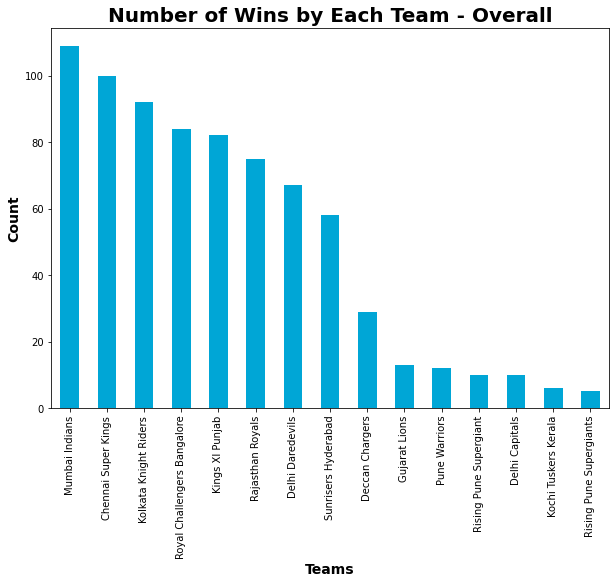

In [65]:
# Create the bar chart
matches_df.winner.value_counts().plot(kind='bar', color='#00A6D6', figsize=(10, 7))

# Add a title and labels
plt.title('Number of Wins by Each Team - Overall', fontsize=20, fontweight='bold')
plt.xlabel('Teams', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Show the plot
plt.show()


#### Chart - 6 - Bar plot

In [66]:
# Chart - 6 visualization code

* We will print name of top player in IPL .

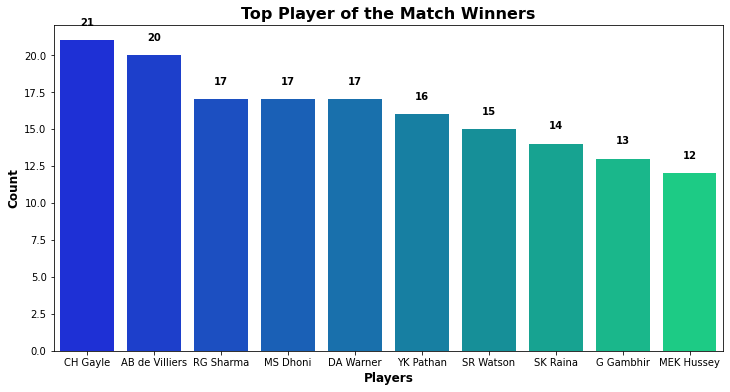

In [67]:
plt.figure(figsize=(12,6))

# Get the top 10 players of the match
top_players = matches_df.player_of_match.value_counts()[:10]

# Plot the data with Seaborn
sns.barplot(x=top_players.index, y=top_players, palette='winter')

# Add labels to the bars
for i, v in enumerate(top_players):
    plt.text(i, v + 1, str(v), color='black', ha='center', fontweight='bold')

# Add title and labels
plt.title("Top Player of the Match Winners", fontsize=16, fontweight='bold')
plt.xlabel("Players", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')

# Show the plot
plt.show()


#### Chart - 7 - 



In [68]:
# Chart - 7 visualization code

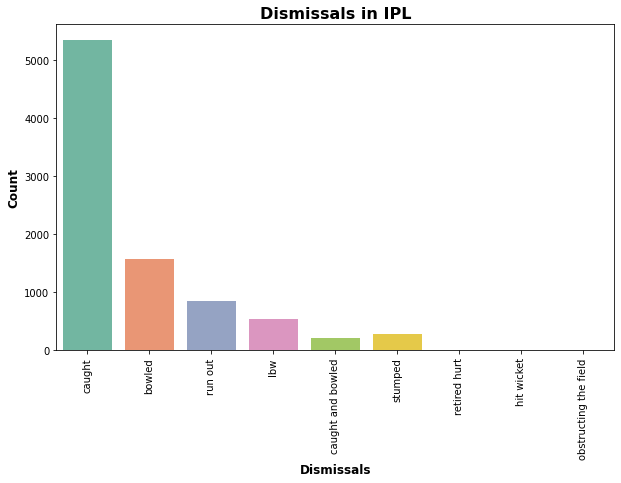

In [69]:
plt.figure(figsize=(10,6))

# Plot the data with Seaborn
ax = sns.countplot(complete_data.dismissal_kind, palette='Set2')

# Add title and labels
plt.title("Dismissals in IPL", fontsize=16, fontweight='bold')
plt.xlabel("Dismissals", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Show the plot
plt.show()


#### Chart - 8 - Countplot

In [70]:
# Chart - 8 visualization code

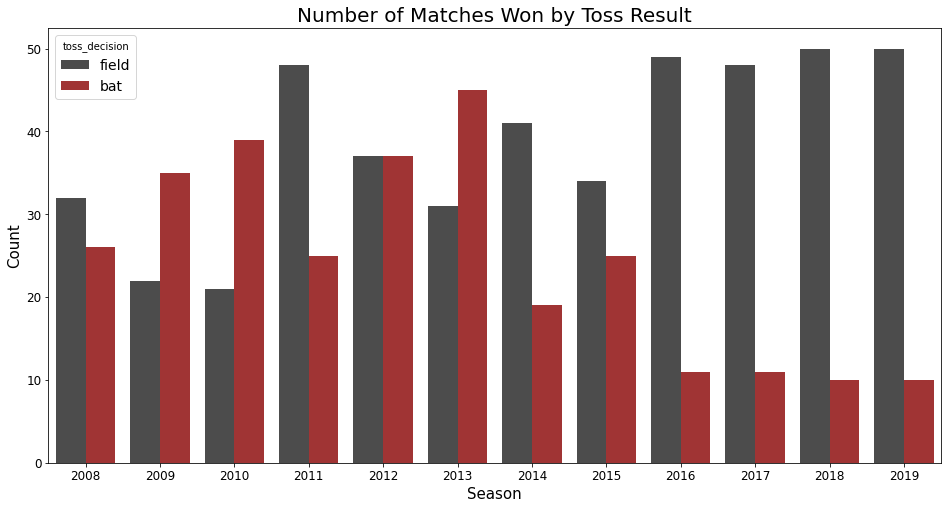

In [71]:
#color palette
custom_palette = {'field': '#4C4C4C', 'bat': '#B22222'}

plt.figure(figsize=(16,8))
sns.countplot(x='season', hue='toss_decision', data=matches_df, palette=custom_palette)
plt.title('Number of Matches Won by Toss Result', fontsize=20)
plt.xlabel('Season', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='toss_decision', fontsize=14)
plt.show()

#### Chart - 9 

In [72]:
# Chart - 9 visualization code

* What is the distribution of wickets taken by each bowling team?

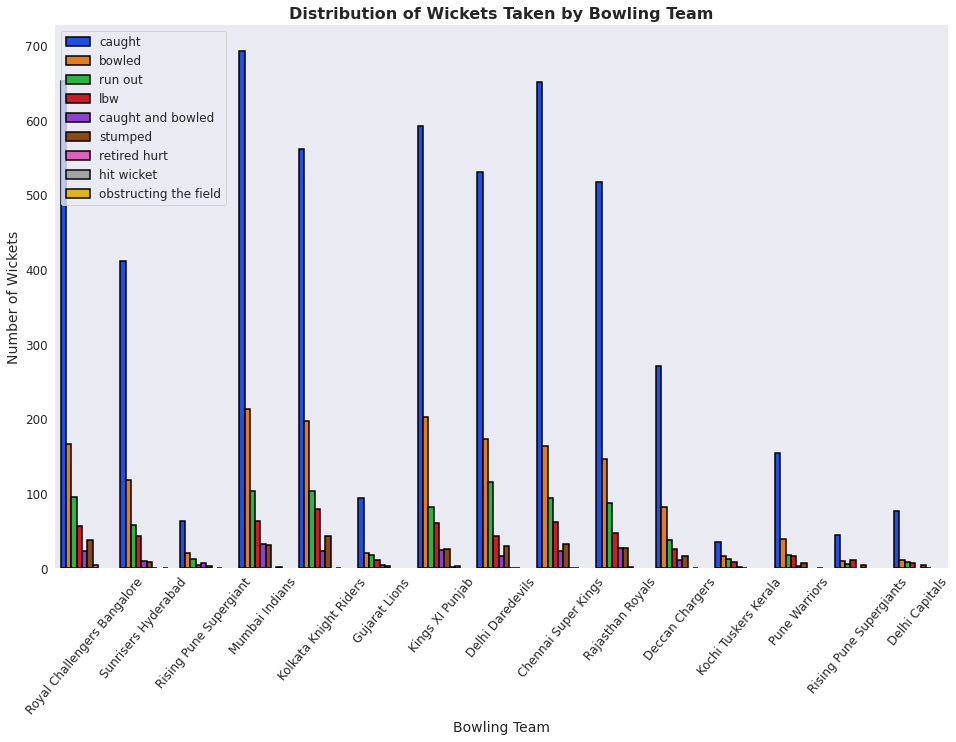

In [73]:
sns.set_style('dark')
plt.figure(figsize=(16, 10))
sns.countplot(x='bowling_team', hue='dismissal_kind', data= complete_data, palette='bright', edgecolor='black', linewidth=1.5)
plt.title('Distribution of Wickets Taken by Bowling Team', fontsize=16, fontweight='bold')
plt.xlabel('Bowling Team', fontsize=14)
plt.ylabel('Number of Wickets', fontsize=14)
plt.xticks(rotation=50, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
sns.despine(left=True, bottom=True)
plt.show()


#### Chart - 10 - Boxplot

In [74]:
# Chart - 8 visualization code

* What is the distribution of runs scored by each batting team?

In [75]:
import plotly.express as px

fig = px.box(complete_data, x='batting_team', y='total_runs')
fig.update_layout(
    title='Distribution of Runs by Batting Team',
    xaxis_title='Batting Team',
    yaxis_title='Total Runs',
    xaxis_tickangle=-90,
    width=800,
    height=600
)
fig.show()


* **Number of matches played by batsman ?**

In [76]:
# we will print no of matches played by batsman
No_Matches_player= complete_data[["match_id","player_dismissed"]]
No_Matches_player =No_Matches_player .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns=["batsman","No_of Matches"]
No_Matches_player .head(5)

batsman  No_of Matches
0    SK Raina            162
1   RG Sharma            155
2  RV Uthappa            153
3     V Kohli            143
4    S Dhawan            137

*  **ipl most wicket taking bowlers ?**

In [77]:
wicket_data= complete_data.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

In [78]:
# we will print ipl most wicket taking bowlers
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

bowler  count
0       SL Malinga    170
1         A Mishra    156
2  Harbhajan Singh    150
3        PP Chawla    149
4         DJ Bravo    147
5          B Kumar    133
6         R Ashwin    125
7        SP Narine    122
8         UT Yadav    119
9        RA Jadeja    108

# **Conclusion**

* Total number of teams participating (Team names and its size) : participates 15 Teams & Team names are Rising Pune Supergiants', 'Kolkata Knight Riders', 'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals', 'Sunrisers Hyderabad', 'Rising Pune Supergiant', 'Gujarat Lions', 'Royal Challengers Bangalore', 'Delhi Daredevils', 'Deccan Chargers', 'Pune Warriors', 'Kochi Tuskers Kerala', 'Delhi Capitals', 'Mumbai Indians'

* The highest number of match played in IPL season was 2013,2014,2015.

* The highest number of match won by Mumbai Indians 4 matches with maximum runs of 146 in the game against Delhi Daredevils.

* Numbers of matches won by team : 'Mumbai Indians' And 'Chennai Super Kings'

* Mumbai Indians And Kolkata Knight Riders these both teams have maximum toss won.

* Toss and Match Win :  61.8%
* Toss Win but Match Lose : 38.2%

* Top player of match winning are CH gayle, AB de villers.

* Dismissals in IPL by most caught and bowled.

* The highest number of matches played by batsman : 1. SK Raina	162, 2. RG Sharma	155, 3. RV Uthappa	153,	4. V Kohli	143, 5. S Dhawan	137.

* The IPL most wicket taken blower is SL Malinga.


